## Lab07_Regressao_Logistica_02

### Disciplina Inteligência Artificial

### Prof: José Humberto Cruvinel

### Nome dos alunos:

* Sérgio Wilson Rosa Brito
* Charles Rodrigues Magalhães
* Julio Luiz dos Reis Filho

Neste jupyter vamos criar um modelo de regressão logística para classificar vinhos.

Dataset: https://archive.ics.uci.edu/ml/datasets/wine

Características:

Classificação em 3 tipos de vinhos de acordo com as características abaixo:

* 1) Álcool
* 2) Ácido málico
* 3) Cinzas
* 4) Alcalinidade das cinzas
* 5) Magnésio
* 6) Fenóis totais
* 7) Flavanóides
* 8) Fenóis não flavonóides
* 9) Proantocianinas
* 10) Intensidade de cor
* 11) Matiz
* 12) OD280 / OD315 de vinhos diluídos
* 13) Prolina

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/)

In [ ]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

## Carregando o dataset

In [ ]:
# Carregando o dataset do sklearn
# https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
# Vendo o shape
print('Data:',wine.data.shape)
print('Target:',wine.target.shape)

Data: (178, 13)
Target: (178,)


Veja que são 178 exemplos, 13 variáveis preditoras e 1 variável Alvo (Target)

In [ ]:
# Nome das colunas preditoras
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# classes alvo (TARGET)
wine.target_names.tolist()

['class_0', 'class_1', 'class_2']

In [ ]:
# Podemos também trabalhar com o Pandas
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df['target'] = wine.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
# Verificando alguns registros do dataset
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
# Vamos verificar se existem valores nulos
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
# Imprimindo o describe()
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Explorando o Dataset

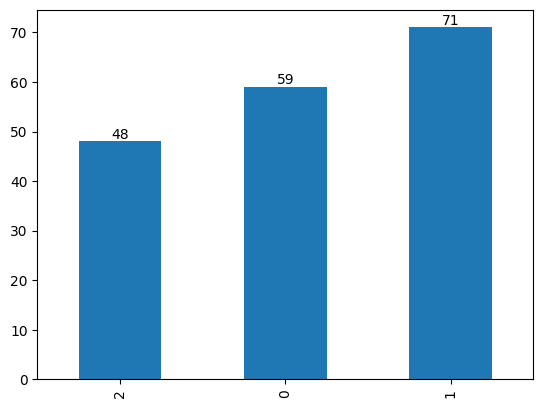

In [ ]:
# Quantidade por classe TARGET
ax = df['target'].value_counts().sort_values().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

<Axes: >

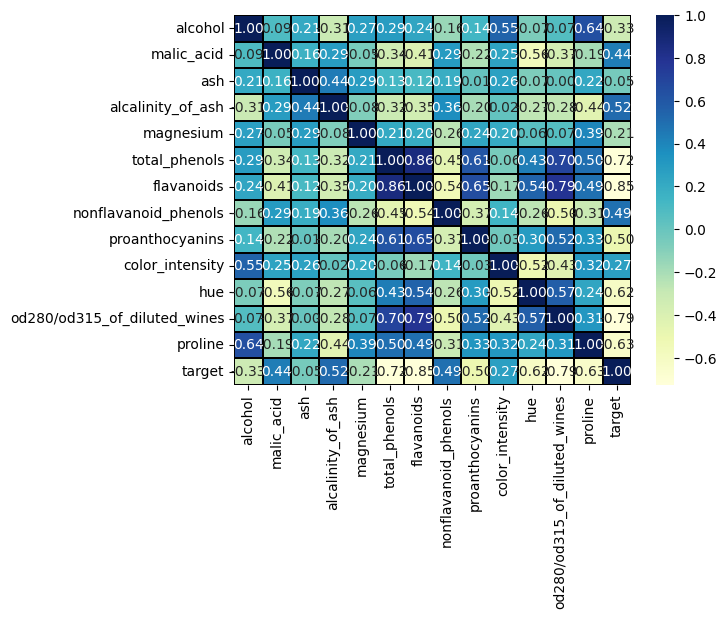

In [ ]:
# Plotando a correlação de outra forma, com um mapa de calor
sns.heatmap(df.corr(), robust=True, fmt=".2f", cmap='YlGnBu',annot=True, linewidths=0.01, linecolor='black')

Não foi possível encontrar uma relação. Vamos tentar de outra forma

In [ ]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.drop(['target'], axis=1)
y = df['target'].values

In [ ]:
# Imprimindo os primeiros valores de X
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(178, 13)
(178,)


## Regressão Logística

In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (142, 13)
y_train: (142,)
X_test: (36, 13)
y_test: (36,)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
# prevendo valores para X_test
y_pred = log_reg.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (36,)


In [ ]:
# Imprimindo o Score para os dados de teste
log_reg.score(X_test,y_test)

0.9444444444444444

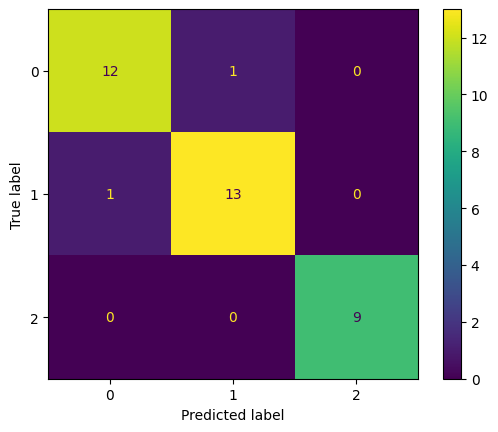

In [ ]:
# Imprimindo a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

In [ ]:
# Calculando as métricas
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print("Accuracy:    ",(tp+tn)/(tp+tn+fp+fn))
print("Precision:   ",tp/(tp+fp))
print("Recall:      ",tp/(tp+fn))
print("Specificity: ",tn/(tn+fn))
print("Sensitivity: ",tp/(tp+fn))

Accuracy:     [ 0.944  0.944  1.000]
Precision:    [ 0.923  0.929  1.000]
Recall:       [ 0.923  0.929  1.000]
Specificity:  [ 0.957  0.955  1.000]
Sensitivity:  [ 0.923  0.929  1.000]


In [ ]:
# Medidas de desempenho
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test,y_pred,average='weighted'))
print("Recall:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred,average='weighted'))
print("ROC AUC:",roc_auc_score(y_test,log_reg.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

Accuracy: 0.9444444444444444
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1 Score: 0.9444444444444444
ROC AUC: 0.9978029217159653


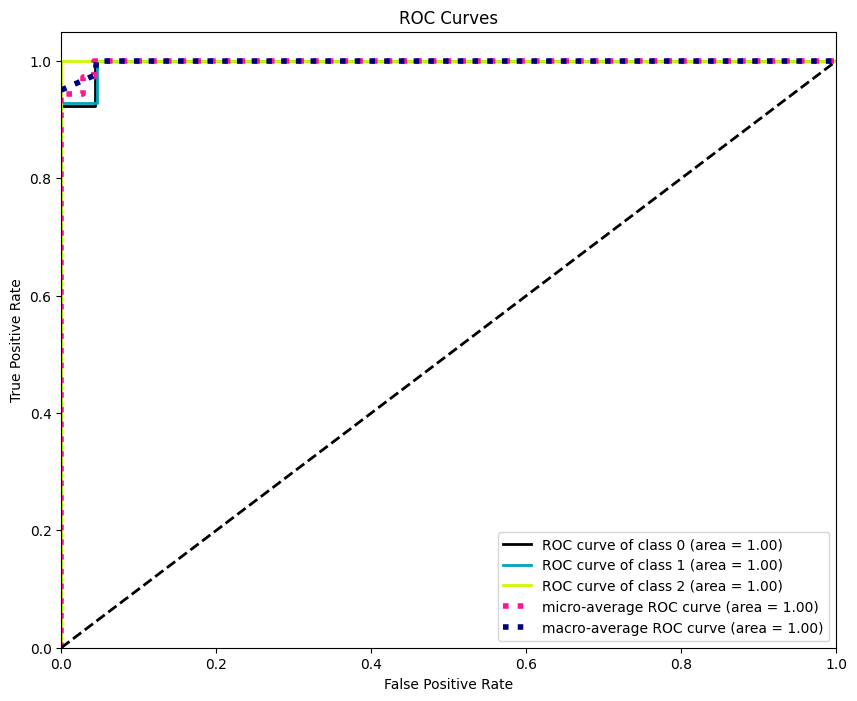

In [ ]:
!pip install scikit-plot
# Plotando a curva ROC para os dados de teste
from scikitplot.metrics import plot_roc
y_probas = log_reg.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(10, 8))
plt.show()

In [ ]:
# Exemplo de previsão utilizando o modelo treinado
ex_pred = log_reg.predict_proba([[12, 2.5, 2.1, 20, 90, 2.1, 3.1, 0.2, 2.9, 6, 1, 3,1200]])
# mostrando resultado em probabilidade
print('Classes: ',log_reg.classes_)
print('Probabilidades: ',ex_pred)

Classes:  [0 1 2]
Probabilidades:  [[ 0.999  0.000  0.001]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Exemplo de previsão utilizando o modelo treinado
ex_pred = log_reg.predict([[12, 2.5, 2.1, 20, 90, 2.1, 3.1, 0.2, 2.9, 6, 1, 3,1200]])
# mostrando resultado
print('Classe prevista: ', ex_pred)

Classe prevista:  [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Exercício 7.1 - Otimizando o modelo de Regressão Logística

Consulte a documentação do LogisticRegression em https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html e altere alguns hiper-parâmetros do modelo (penalty, C, solver) e realize novos treinamentos para ver se consegue aumentar o desempenho.

Utilize o método GridSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para variar os parâmetros e encontrar o melhor estimador possível.

Dica: pesquise na Internet por exemplos de uso de GridSearchCV com Logistic Regression

Accuracy:     [ 0.972  0.972  1.000]
Precision:    [ 0.929  1.000  1.000]
Recall:       [ 1.000  0.929  1.000]
Specificity:  [ 1.000  0.957  1.000]
Sensitivity:  [ 1.000  0.929  1.000]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Accuracy: 0.9722222222222222
Precision: 0.9742063492063492
Recall: 0.9722222222222222
F1 Score: 0.9722222222222222
ROC AUC: 0.9966880945141815
Exemplo de previsão utilizando o modelo treinado -> [12, 2.5, 2.1, 20, 90, 2.1, 3.1, 0.2, 2.9, 6, 1, 3,1200]
Classe prevista:  [0]


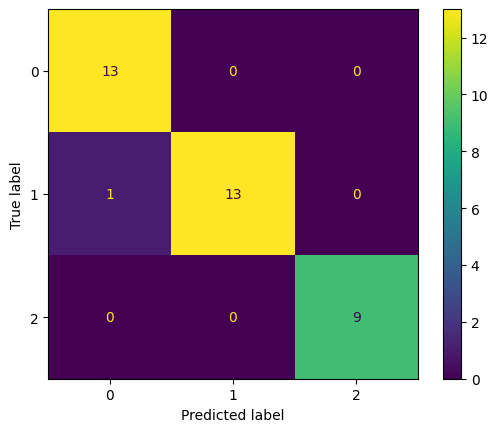

In [ ]:
# Logistic Regression Optimized - Wine Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'] ,
    'C':[1.0,1.25,1.5,2.0,2.25,2.5,3.0,3.25,3.5],
    'max_iter': [100,200,300,400,500],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced','none']
    }

    log_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, verbose=0, cv=5, n_jobs=-1)
    log_reg = Pipeline([('scale', MinMaxScaler()), ('knn', log_reg)])
    log_reg.fit(X_train, y_train)

    # Prevendo valores para X_test
    y_pred = log_reg.predict(X_test)

    # Imprimindo a matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
    disp.plot()

    # Calculando as métricas
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print("Accuracy:    ", (tp + tn) / (tp + tn + fp + fn))
    print("Precision:   ", tp / (tp + fp))
    print("Recall:      ", tp / (tp + fn))
    print("Specificity: ", tn / (tn + fn))
    print("Sensitivity: ", tp / (tp + fn))

    # Medidas de desempenho
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr'))

    # Exemplo de previsão utilizando o modelo treinado
    print("Exemplo de previsão utilizando o modelo treinado -> [12, 2.5, 2.1, 20, 90, 2.1, 3.1, 0.2, 2.9, 6, 1, 3,1200]")
    ex_pred = log_reg.predict([[12, 2.5, 2.1, 20, 90, 2.1, 3.1, 0.2, 2.9, 6, 1, 3,1200]])
    print('Classe prevista: ', ex_pred)




# Exercício 7.2 - Criando um classificador para prever problemas de coração

Baixe o dataset framingham.csv a partir do link https://drive.google.com/file/d/1ATsk1aYaKTGDo1BNFgeZQhU_zUoby43w/view?usp=sharing e coloque esse arquivo na pasta arquivos_colab/Lab07 do seu Drive

Carregue esse arquivo e crie um classificador para prever a chance de problemas cardíacos em 10 anos (coluna TenYearCHD).

Faça o tratamento dos dados faltantes, utilizando a estratégia adequada.

Exemplo 1: substituindo por zeros:

```
df['cigsPerDay'].fillna(value=0.0,inplace=True)
```

Exemplo 2: substituindo pelo valor médio:

```
df['BPMeds'].fillna(value=(df['BPMeds'].mean()),inplace=True)
```

Imprima a matriz de confusão, métricas e curva ROC






In [ ]:
# Execute esta célula para montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab07
%ls -la

Mounted at /content/drive
/content/drive/MyDrive/Ciência da Computação - UniBH/Inteligencia Artificial/arquivos_colab/Lab07
total 605
-rw------- 1 root root 195955 Nov  5 15:40 framingham.csv
-rw------- 1 root root 422554 Nov  6 22:56 Lab07_Regressao_Logistica_02.ipynb


In [74]:
df = pd.read_csv("framingham.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [75]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [76]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [77]:
df['education'].replace(np.nan, 1.0, inplace= True)
df['BPMeds'].replace(np.nan, 0.0, inplace= True)
df['totChol'].replace(np.nan, df['totChol'].mean(), inplace= True)
df['glucose'].replace(np.nan, df['glucose'].mean(), inplace= True)
df['cigsPerDay'].replace(np.nan, df['cigsPerDay'].mean(), inplace= True)
df['BMI'].replace(np.nan, df['BMI'].mean(), inplace= True)
df['heartRate'].replace(np.nan, df['heartRate'].mean(), inplace= True)

In [78]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

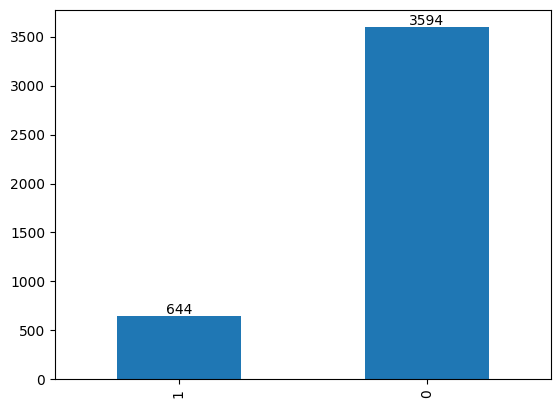

In [79]:
# Quantidade por classe TenYearCHD
ax = df['TenYearCHD'].value_counts().sort_values().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

<Axes: >

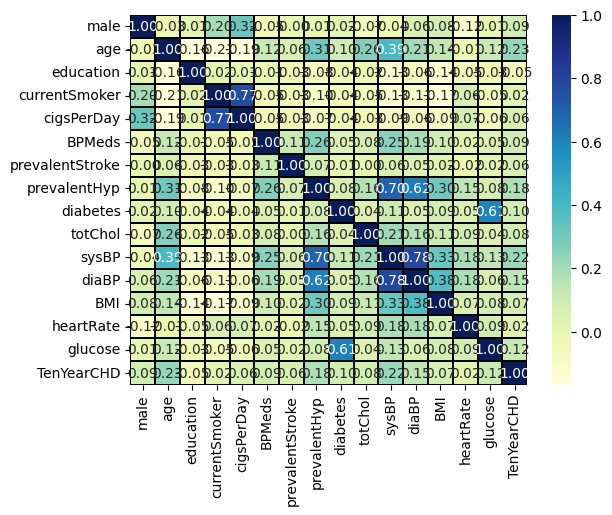

In [80]:
# Plotando a correlação com um mapa de calor
sns.heatmap(df.corr(), robust=True, fmt=".2f", cmap='YlGnBu',annot=True, linewidths=0.01, linecolor='black')

In [81]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD'].values

# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(4238, 15)
(4238,)


In [67]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 496.8 KB


In [82]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=1)
pca=PCA(0.95)
pca.fit(X_train)
X_train= pca.transform(X_train)
X_test= pca.transform(X_test)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (3390, 5)
y_train: (3390,)
X_test: (848, 5)
y_test: (848,)


In [70]:
!pip install scikit-plot

ERROR: Operation cancelled by user


Fitting 5 folds for each of 1 candidates, totalling 5 fits
---MÉTRICAS DE DESEMPENHO---
Accuracy:     [ 0.841  0.841]
Precision:    [ 0.840  1.000]
Recall:       [ 1.000  0.043]
Specificity:  [ 1.000  0.840]
Sensitivity:  [ 1.000  0.043]
---REPORT---
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       707
           1       1.00      0.04      0.08       141

    accuracy                           0.84       848
   macro avg       0.92      0.52      0.50       848
weighted avg       0.87      0.84      0.77       848

---MEDIDAS DE DESEMPENHO---
Accuracy: 0.8408018867924528
Precision: 0.8663265248958008
Recall: 0.8408018867924528
F1 Score: 0.7746380090947667
ROC AUC: 0.6829977830609809
Melhores Hiperparâmetros: {}


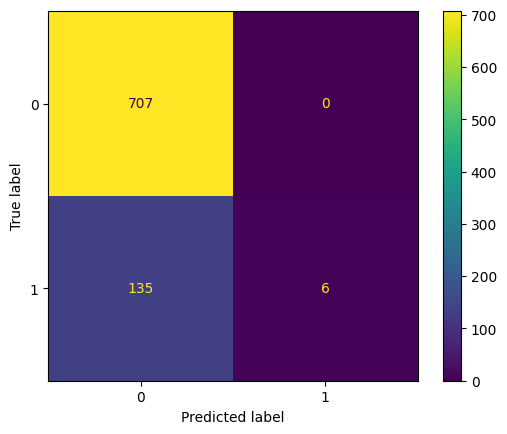

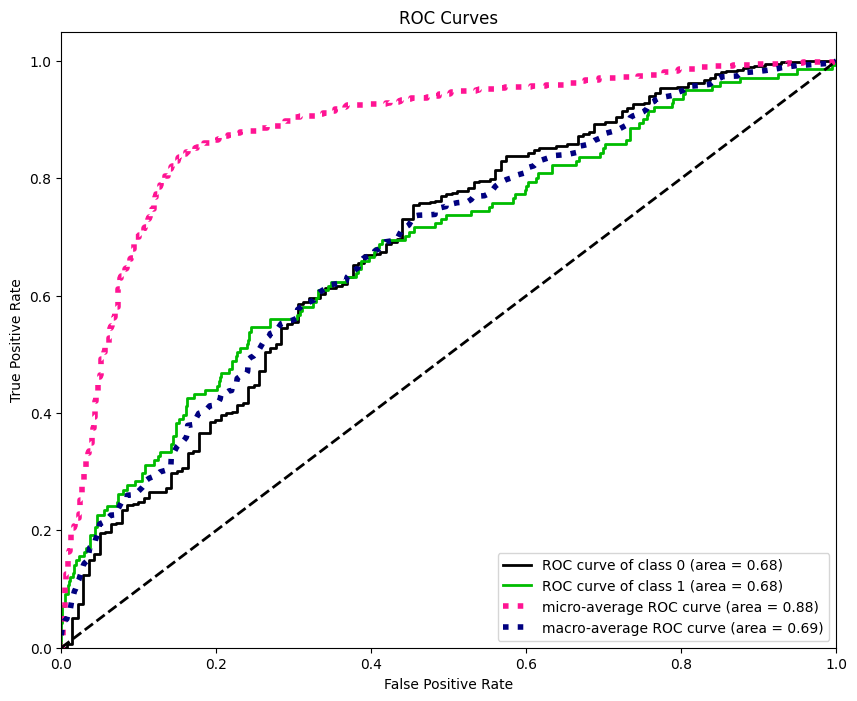

In [108]:
# Logistic Regression - Heart Disease 10 Year Prediction Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    param_grid_lr = {}

    log_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)
    results = log_reg.fit(X_train, y_train)

    # Prevendo valores para X_test
    y_pred = log_reg.predict(X_test)

    # Imprimindo a matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
    disp.plot()

    # Calculando as métricas
    print("---MÉTRICAS DE DESEMPENHO---")
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print("Accuracy:    ", (tp + tn) / (tp + tn + fp + fn))
    print("Precision:   ", tp / (tp + fp))
    print("Recall:      ", tp / (tp + fn))
    print("Specificity: ", tn / (tn + fn))
    print("Sensitivity: ", tp / (tp + fn))

    # Medidas de desempenho
    print("---REPORT---")
    print(classification_report(y_test, y_pred))
    print("---MEDIDAS DE DESEMPENHO---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

    print("Melhores Hiperparâmetros:", log_reg.best_params_)

    # Plotando a curva ROC para os dados de teste
    y_probas = log_reg.predict_proba(X_test)
    plot_roc(y_test, y_probas, figsize=(10, 8))
    plt.show()



